In [4]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 19s 2us/step


In [7]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [11]:
X_train[0].shape

(28, 28)

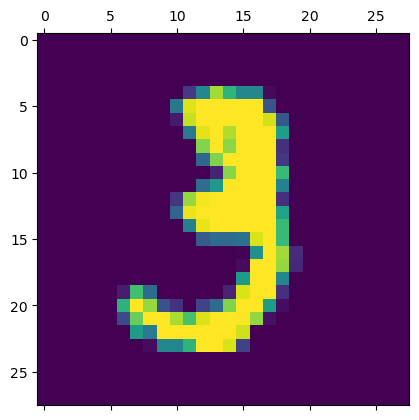

In [14]:
plt.matshow(X_train[10])

In [22]:
X_train = X_train / 255
X_test = X_test / 255

In [23]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ),activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4678 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3045 - accuracy: 0.9141
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2838 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2672 - accuracy: 0.9262


In [25]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2662 - accuracy: 0.9250


[0.26621773838996887, 0.925000011920929]

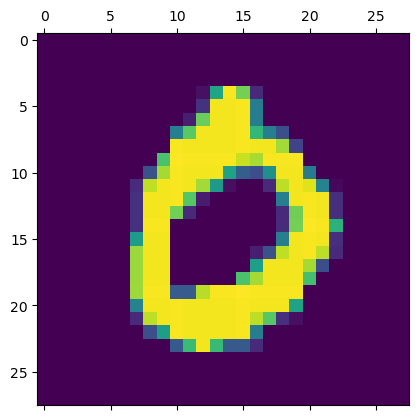

In [32]:
plt.matshow(X_test[3])

In [33]:
y_predicted = model.predict(X_test_flattened)


313/313 [==============================] - 0s 1ms/step


In [34]:
np.argmax(y_predicted[3])

0

In [35]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [36]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [38]:
cm = tensorflow.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Actual')

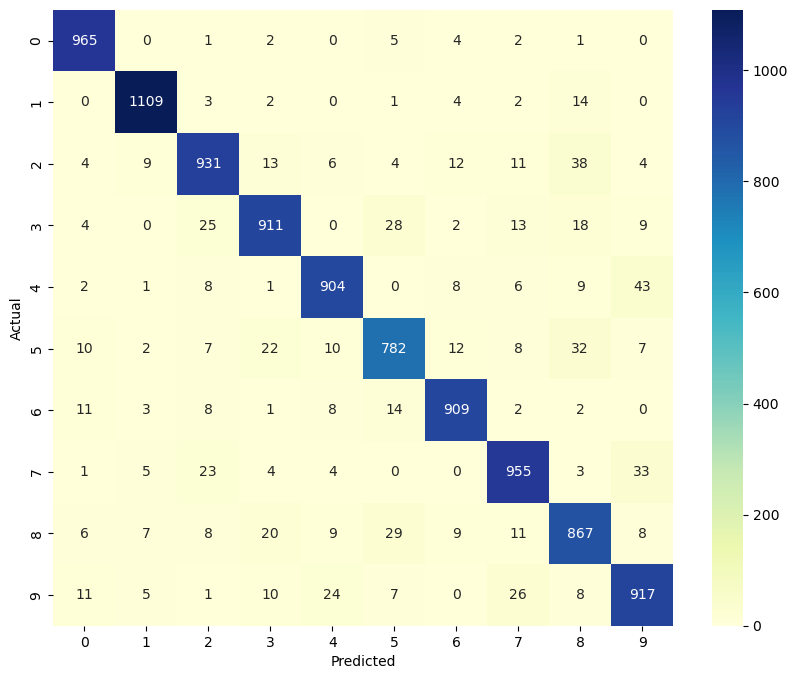

In [40]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [91]:
model = keras.Sequential([
    keras.layers.Dense(784, input_shape=(784, ), activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1781 - accuracy: 0.9450
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0797 - accuracy: 0.9755
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0534 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0430 - accuracy: 0.9858
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0346 - accuracy: 0.9889


In [92]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0902 - accuracy: 0.9772


[0.0901850089430809, 0.9771999716758728]

In [79]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


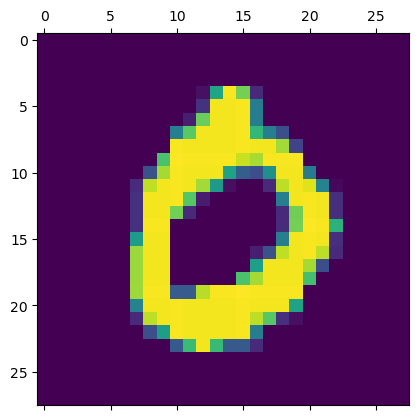

In [80]:
plt.matshow(X_test[3])

In [81]:
np.argmax(y_predicted[3])

0

In [82]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [83]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [84]:
cm = tensorflow.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Actual')

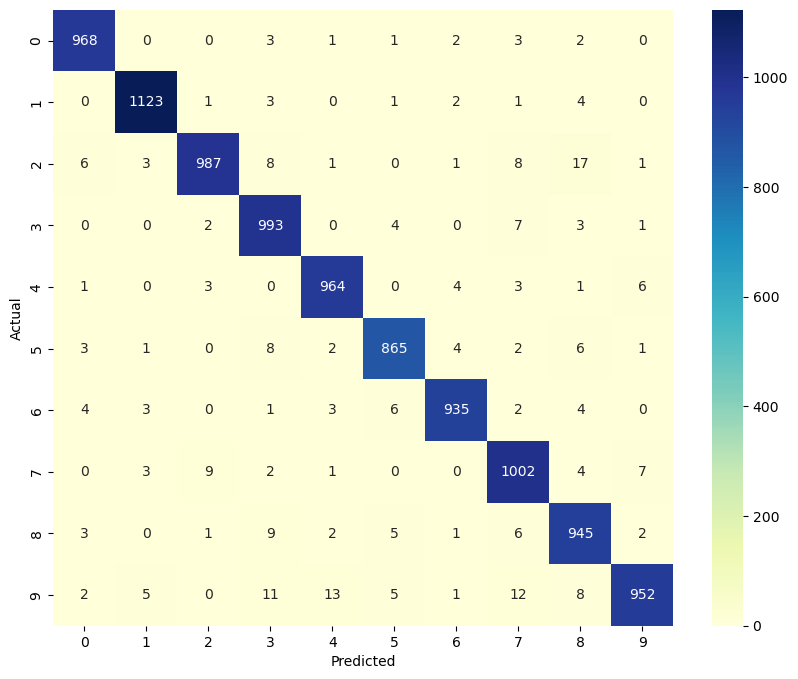

In [85]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")